time averaged intensity

In [1]:
import sys
sys.path.append('..')

In [14]:
from seizurecast.features.to_sql import SQLengine
import pandas as pd
tokenfile = pd.read_sql("select directory.token_path from directory where tcp_type='01_tcp_ar' limit 1", SQLengine).to_numpy()[0,0]

In [10]:
pd.read_sql('select * from directory limit 1', SQLengine)

,index,path0,path1,path2,path3,path4,path5,path6,train_test,tcp_type,patient_group,patient,session,token,token_path
0,0,,Users,yanxlin,github,ids,tusz_1_5_2,edf,train,03_tcp_ar_a,104,00010418,s018_2014_06_01,00010418_s018_t008,/Users/yanxlin/github/ids/tusz_1_5_2/edf/train...


In [19]:
from seizurecast.data.make_dataset import make_dataset
ds, lbl = make_dataset([tokenfile])

In [25]:
import numpy as np
np.shape(ds)
pd.DataFrame({'sp'+str(i):fea for i, fea in enumerate(np.mean(np.array(ds),axis=1).transpose())}).head()

,sp0,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10,sp11,sp12,sp13,sp14,sp15,sp16,sp17,sp18,sp19,sp20,sp21,sp22,sp23,sp24,sp25,sp26,sp27,sp28,sp29,sp30,sp31,sp32,sp33,sp34,sp35,sp36,sp37,sp38,sp39,...,sp216,sp217,sp218,sp219,sp220,sp221,sp222,sp223,sp224,sp225,sp226,sp227,sp228,sp229,sp230,sp231,sp232,sp233,sp234,sp235,sp236,sp237,sp238,sp239,sp240,sp241,sp242,sp243,sp244,sp245,sp246,sp247,sp248,sp249,sp250,sp251,sp252,sp253,sp254,sp255
0,-0.246941,-0.596118,-0.933294,-1.226813,-1.444920,-1.558692,-1.545011,-1.389051,-1.086285,-0.643921,-0.081338,0.570502,1.270744,1.971341,2.620370,3.165918,3.560316,3.764151,3.749704,3.503776,3.029447,2.346491,1.490572,0.511100,-0.532133,-1.573242,-2.545133,-3.384629,-4.037360,-4.462082,-4.633957,-4.546590,-4.212728,-3.663305,-2.944979,-2.116452,-1.243585,-0.393984,0.368487,0.989037,...,3.435852,3.060216,2.631668,2.217079,1.881531,1.684640,1.677072,1.897504,2.370101,3.102334,4.083589,5.284727,6.658361,8.140226,9.651521,11.102400,12.396614,13.436679,14.129594,14.392915,14.160869,13.390040,12.063990,10.196631,7.834062,5.054313,1.964983,-1.301271,-4.593233,-7.749319,-10.606998,-13.012719,-14.831898,-15.958295,-16.322035,-15.895651,-14.697593,-12.792815,-10.290275,-7.337498
1,-4.112294,-0.812140,2.358026,5.198942,7.530041,9.201611,10.105104,10.180725,9.422048,7.877008,5.645206,2.871820,-0.261862,-3.550459,-6.778052,-9.732538,-12.219811,-14.076718,-15.181835,-15.463412,-14.904088,-13.541837,-11.467015,-8.815948,-5.761413,-2.500661,0.758217,3.810419,6.468040,8.572459,10.004523,10.692042,10.613930,9.800687,8.331455,6.327687,3.944050,1.357158,-1.246832,-3.684850,...,-2.058859,-2.233115,-2.290791,-2.249138,-2.131855,-1.967043,-1.784831,-1.615064,-1.485107,-1.417911,-1.430534,-1.532980,-1.727591,-2.009039,-2.364813,-2.776098,-3.218975,-3.665892,-4.087362,-4.453768,-4.737000,-4.912082,-4.958620,-4.861924,-4.613785,-4.212961,-3.665404,-2.983893,-2.187456,-1.300561,-0.351887,0.626937,1.602689,2.542093,3.413222,4.186763,4.837022,5.342945,5.689160,5.866457
2,5.872093,5.709877,5.389725,4.927159,4.342673,3.660811,2.909135,2.117105,1.314929,0.532336,-0.202577,-0.864440,-1.431707,-1.887635,-2.220970,-2.426268,-2.504170,-2.461423,-2.310587,-2.069545,-1.760552,-1.409112,-1.042831,-0.690104,-0.378637,-0.133853,0.022631,0.074291,0.010894,-0.170611,-0.465716,-0.862206,-1.340520,-1.874603,-2.433017,-2.980450,-3.479618,-3.893427,-4.187259,-4.331102,...,5.263185,5.461846,5.449285,5.239322,4.855203,4.327555,3.692062,2.987090,2.251524,1.522757,0.834893,0.217296,-0.306500,-0.719669,-1.012596,-1.182952,-1.235615,-1.182210,-1.040369,-0.832808,-0.586001,-0.328748,-0.090634,0.099677,0.216183,0.237190,0.146749,-0.064211,-0.397035,-0.844802,-1.392324,-2.016614,-2.687832,-3.370692,-4.026319,-4.614483,-5.095907,-5.434638,-5.600457,-5.571159
3,-5.334413,-4.888965,-4.245211,-3.425121,-2.461546,-1.396829,-0.280569,0.833051,1.888127,2.830277,3.609925,4.185284,4.524947,4.609929,4.434960,4.008999,3.355037,2.508881,1.517047,0.434304,-0.679469,-1.763022,-2.757260,-3.608633,-4.272490,-4.715869,-4.919434,-4.878655,-4.604149,-4.120905,-3.466645,-2.689383,-1.844258,-0.989924,-0.184728,0.517009,1.068600,1.434166,1.591002,1.531259,...,4.427926,4.688833,4.850216,4.887678,4.787879,4.549525,4.183303,3.710772,3.162427,2.575068,1.988652,1.443017,0.974726,0.614193,0.383441,0.294603,0.349224,0.538353,0.843490,1.238283,1.690544,2.164714,2.624570,3.035767,3.368343,3.598714,3.711079,3.698196,3.561392,3.310129,2.960954,2.536047,2.061609,1.565873,1.077219,0.622552,0.225846,-0.093043,-0.319358,-0.443960
4,-0.463675,-0.381426,-0.205906,0.048858,0.364165,0.717354,1.082765,1.432776,1.738548,1.971222,2.103329,2.110085,1.970807,1.670184,1.199584,0.558292,-0.245638,-1.194822,-2.262330,-3.411992,-4.599518,-5.774250,-6.881391,-7.864825,-8.670239,-9.248475,-9.558823,-9.572167,-9.273596,-8.664106,-7.761634,-6.601101,-5.233251,-3.722405,-2.143166,-0.576130,0.896973,2.198331,3.259200,4.024708,...,1.195277,1.317598,1.288752,1.111967,0.805915,0.403131,-0.052977,-0.512150,-0.92

Apply the above average intensity to the pre-processed dataset, push it to table `train256hz_01`

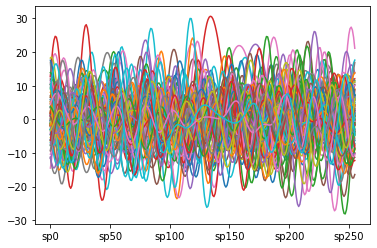

In [36]:
# Check a few plot
pd.read_sql('select * from train256hz_01 limit 100', SQLengine).transpose().iloc[1:257,:].plot(legend=False)